<a href="https://colab.research.google.com/github/sakethyalamanchili/SimpleML-Projects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST**

In [38]:
import tensorflow as tf  # Import TensorFlow library
import matplotlib.pyplot as plt  # Import matplotlib library for visualization
import random  # Import the random module
import numpy as np  # Import the NumPy library
import pandas as pd # Import the Pandas library
import seaborn as sns # Import Seaborn library for visualization with matplotlib

from sklearn.metrics import confusion_matrix # Import confusion matrix from metrics
from keras.datasets import fashion_mnist  # Import Fashion MNIST dataset from Keras
from tensorflow.keras.utils import plot_model

In [4]:
# Load the Fashion MNIST dataset
# Fashion MNIST is a dataset of 28x28 grayscale images of 10 fashion categories, along with labels
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [5]:
# Print the shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

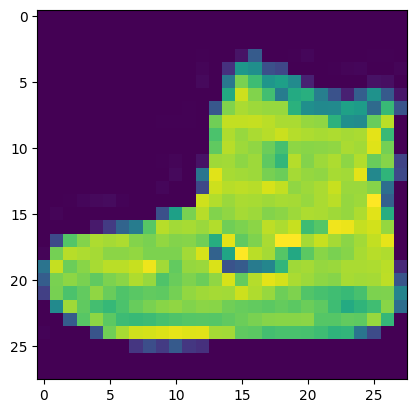

In [9]:
# Display an image from the training data
plt.imshow(train_data[0])  # Use imshow function to display the image at index 0 in the training data

# Show the plot
plt.show()

In [10]:
# Define the class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a list 'a' containing elements from 'class_names'
# This list comprehension iterates over each element in 'class_names' and assigns it to 'a'
a = [i for i in class_names]

# Print the list 'a'
print(a)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [11]:
train_labels[0]

9

In [12]:
class_names[9]

'Ankle boot'

In [13]:
class_names[train_labels[0]]

'Ankle boot'

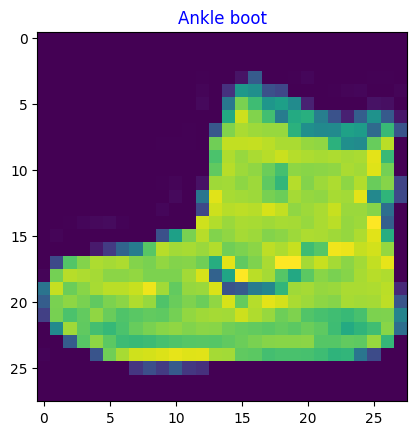

In [14]:
lab = 0  # Set lab variable to 0

# Display an image from the training data
plt.imshow(train_data[0])  # Use imshow function to display the image at index 0 in the training data

# Set the title of the plot to the corresponding class name based on the label of the image
plt.title(class_names[train_labels[lab]], c='b')  # Use the label at index 'lab' to get the corresponding class name from 'class_names' list, set title color to blue

# Show the plot
plt.show()

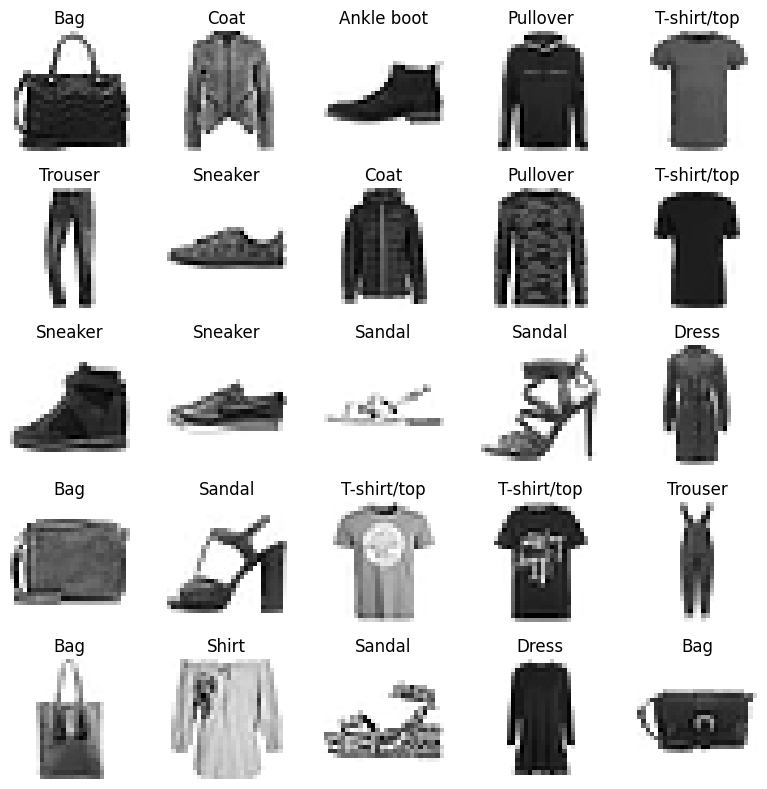

In [16]:
# Set the figure size for the plot
plt.figure(figsize=(8, 8))

# Loop through 25 random samples from the training data
for i in range(25):
    plt.subplot(5, 5, i+1)  # Create subplots in a 5x5 grid
    rand = random.choice(range(len(train_data)))  # Choose a random index from the training data
    plt.imshow(train_data[rand], cmap=plt.cm.binary)  # Display the image at the random index, using binary colormap
    plt.title(class_names[train_labels[rand]])  # Set the title of the subplot to the corresponding class name
    plt.axis(False)  # Turn off axis
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

In [18]:
tf.random.set_seed(42)  # Set random seed for reproducibility

# Define the architecture of model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images to a 1D array
    tf.keras.layers.Dense(4, activation='relu'),  # Add a dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='relu'),  # Add another dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Add the output layer with 10 neurons for classification and softmax activation
])

# Compile model_1 with appropriate loss function, optimizer, and metrics
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use Sparse Categorical Crossentropy loss
    optimizer=tf.keras.optimizers.Adam(),  # Use Adam optimizer
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train model_1 on the training data
history = model_1.fit(
    train_data,  # Training data
    train_labels,  # Training labels
    epochs=10,  # Number of epochs
    validation_data=(test_data, test_labels)  # Validation data for evaluation during training
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3385 - accuracy: 0.1156 - val_loss: 2.2386 - val_accuracy: 0.1359
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9952 - accuracy: 0.1891 - val_loss: 1.7583 - val_accuracy: 0.2701
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7411 - accuracy: 0.2582 - val_loss: 1.6803 - val_accuracy: 0.2888
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6794 - accuracy: 0.2792 - val_loss: 1.6506 - val_accuracy: 0.2841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6530 - accuracy: 0.2860 - val_loss: 1.6253 - val_accuracy: 0.3013
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6362 - accuracy: 0.2864 - val_loss: 1.6249 - val_accuracy: 0.2864
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6269 - accuracy: 0.2883 - val_loss: 1.6067 - val_accuracy:

In [20]:
# Convert training labels to one-hot encoded format
tf.keras.utils.to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
tf.random.set_seed(42)  # Set random seed for reproducibility

# Define the architecture of model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images to a 1D array
    tf.keras.layers.Dense(4, activation='relu'),  # Add a dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='relu'),  # Add another dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Add the output layer with 10 neurons for classification and softmax activation
])

# Compile model_2 with appropriate loss function, optimizer, and metrics
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Use Categorical Crossentropy loss
    optimizer=tf.keras.optimizers.Adam(),  # Use Adam optimizer
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train model_2 on the training data with one-hot encoded labels
history_2 = model_2.fit(
    train_data,  # Training data
    tf.one_hot(train_labels, depth=10),  # One-hot encoded training labels
    epochs=10,  # Number of epochs
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))  # Validation data with one-hot encoded labels
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.1562 - accuracy: 0.1743 - val_loss: 1.9602 - val_accuracy: 0.1893
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9411 - accuracy: 0.1960 - val_loss: 1.9022 - val_accuracy: 0.2151
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7634 - accuracy: 0.2611 - val_loss: 1.6993 - val_accuracy: 0.2764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6805 - accuracy: 0.2730 - val_loss: 1.6848 - val_accuracy: 0.2507
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6591 - accuracy: 0.2709 - val_loss: 1.6512 - val_accuracy: 0.2779
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6461 - accuracy: 0.2697 - val_loss: 1.6345 - val_accuracy: 0.2758
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6340 - accuracy: 0.2843 - val_loss: 1.6271 - val_accuracy

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
train_data.min(), train_data.max()

(0, 255)

In [25]:
# Normalize the pixel values of the training data
train_data_norm = train_data / 255.0

# Normalize the pixel values of the testing data
test_data_norm = test_data / 255.0

# Print the lengths of the normalized training and testing data
len(train_data_norm), len(test_data_norm)

(60000, 10000)

In [27]:
# Find the minimum pixel value in the normalized test data
min_test_data_norm = np.min(test_data_norm)

# Find the maximum pixel value in the normalized training data
max_train_data_norm = np.max(train_data_norm)

# Print the minimum and maximum pixel values
min_test_data_norm, max_train_data_norm

(0.0, 1.0)

In [29]:
tf.random.set_seed(42)  # Set random seed for reproducibility

# Define the architecture of model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images to a 1D array
    tf.keras.layers.Dense(4, activation='relu'),  # Add a dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='relu'),  # Add another dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Add the output layer with 10 neurons for classification and softmax activation
])

# Compile model_3 with appropriate loss function, optimizer, and metrics
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use Sparse Categorical Crossentropy loss
    optimizer=tf.keras.optimizers.Adam(),  # Use Adam optimizer
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train model_3 on the normalized training data
history_3 = model_3.fit(
    train_data_norm,  # Normalized training data
    train_labels,  # Training labels
    epochs=10,  # Number of epochs
    validation_data=(test_data_norm, test_labels)  # Validation data
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5174 - accuracy: 0.4038 - val_loss: 1.2776 - val_accuracy: 0.4643
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2279 - accuracy: 0.4850 - val_loss: 1.1479 - val_accuracy: 0.5369
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0345 - accuracy: 0.5778 - val_loss: 0.9045 - val_accuracy: 0.6756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7585 - accuracy: 0.7337 - val_loss: 0.7296 - val_accuracy: 0.7487
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6689 - accuracy: 0.7663 - val_loss: 0.6759 - val_accuracy: 0.7765
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6246 - accuracy: 0.7882 - val_loss: 0.6590 - val_accuracy: 0.7801
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5944 - accuracy: 0.7976 - val_loss: 0.6260 - val_accuracy:

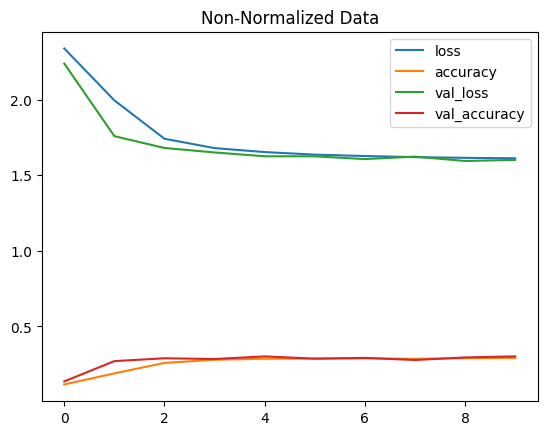

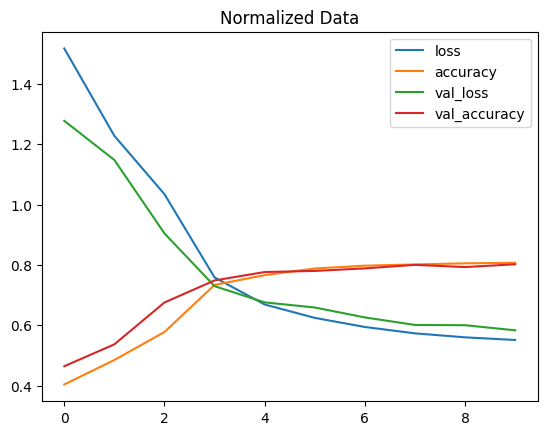

In [30]:
# Plot the training history of the model trained on non-normalized data
pd.DataFrame(history.history).plot(title='Non-Normalized Data')

# Plot the training history of the model trained on normalized data
pd.DataFrame(history_3.history).plot(title='Normalized Data')

# Show the plots
plt.show()

In [32]:
tf.random.set_seed(42)  # Set random seed for reproducibility

# Define the architecture of model_4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images to a 1D array
    tf.keras.layers.Dense(4, activation='relu'),  # Add a dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='relu'),  # Add another dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Add the output layer with 10 neurons for classification and softmax activation
])

# Compile model_4 with appropriate loss function, optimizer, and metrics
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use Sparse Categorical Crossentropy loss
    optimizer=tf.keras.optimizers.Adam(),  # Use Adam optimizer
    metrics=['accuracy']  # Monitor accuracy during training
)

# Define a learning rate scheduler callback
lr_setcallback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# Train model_4 on the normalized training data with the learning rate scheduler callback
history_4 = model_4.fit(
    train_data_norm,  # Normalized training data
    train_labels,  # Training labels
    epochs=40,  # Number of epochs
    validation_data=(test_data_norm, test_labels),  # Validation data
    callbacks=[lr_setcallback]  # Learning rate scheduler callback
)

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 1.0776 - accuracy: 0.6140 - val_loss: 0.7617 - val_accuracy: 0.7336 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6823 - accuracy: 0.7568 - val_loss: 0.6892 - val_accuracy: 0.7573 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6390 - accuracy: 0.7688 - val_loss: 0.6878 - val_accuracy: 0.7551 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6216 - accuracy: 0.7746 - val_loss: 0.6469 - val_accuracy: 0.7694 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6107 - accuracy: 0.7789 - val_loss: 0.6509 - val_accuracy: 0.7747 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6027 - accuracy: 0.7819 - val_loss: 0.6444 - val_accuracy: 0.7733 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

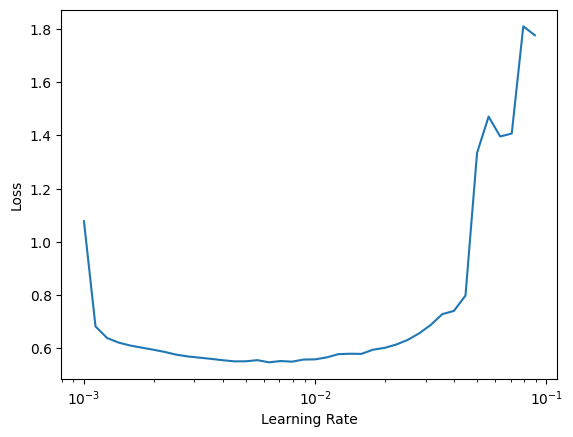

In [33]:
lr_set = 1e-3 * 10 ** (np.arange(40)/20)  # Create an array of learning rates

# Create a DataFrame to store the training history of model_4
loss = pd.DataFrame(history_4.history)

# Plot the learning rate vs. loss curve using a logarithmic scale for the learning rate
plt.semilogx(lr_set, loss['loss'])  # Plot learning rate on a logarithmic scale
plt.xlabel("Learning Rate")  # Set label for x-axis
plt.ylabel("Loss")  # Set label for y-axis
plt.show()  # Show the plot

In [ ]:
1e-3

0.001

In [34]:
tf.random.set_seed(42)  # Set random seed for reproducibility

# Define the architecture of model_5
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images to a 1D array
    tf.keras.layers.Dense(4, activation='relu'),  # Add a dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(4, activation='relu'),  # Add another dense layer with 4 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Add the output layer with 10 neurons for classification and softmax activation
])

# Compile model_5 with appropriate loss function, optimizer, and metrics
model_5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use Sparse Categorical Crossentropy loss
    optimizer=tf.keras.optimizers.Adam(0.001),  # Use Adam optimizer with learning rate 0.001
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train model_5 on the normalized training data
history_5 = model_5.fit(
    train_data_norm,  # Normalized training data
    train_labels,  # Training labels
    epochs=20,  # Number of epochs
    validation_data=(test_data_norm, test_labels)  # Validation data
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.7924 - accuracy: 0.2279 - val_loss: 1.6535 - val_accuracy: 0.2984
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6036 - accuracy: 0.3157 - val_loss: 1.5654 - val_accuracy: 0.3509
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5412 - accuracy: 0.3519 - val_loss: 1.5231 - val_accuracy: 0.3570
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5038 - accuracy: 0.3624 - val_loss: 1.4934 - val_accuracy: 0.3682
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4794 - accuracy: 0.3727 - val_loss: 1.4716 - val_accuracy: 0.3807
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4625 - accuracy: 0.3771 - val_loss: 1.4578 - val_accuracy: 0.3807
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4501 - accuracy: 0.3799 - val_loss: 1.4486 - val_accuracy:

In [35]:
# Make predictions on the normalized testing data using model_5
y_preds = model_5.predict(test_data_norm)

# Extract the prediction for the first sample
first_prediction = y_preds[0]

# Find the index of the maximum predicted probability
predicted_class_index = tf.argmax(first_prediction)

# Get the corresponding class name using the index
predicted_class_name = class_names[predicted_class_index]

# Print the prediction for the first sample, the index of the predicted class, and the corresponding class name
first_prediction, predicted_class_index, predicted_class_name

313/313 [==============================] - 1s 1ms/step


(array([6.0319266e-15, 1.8150856e-27, 8.1870056e-21, 2.1001482e-17,
        3.5903859e-23, 1.9201776e-01, 1.3560365e-15, 5.5234134e-01,
        9.1772655e-04, 2.5472322e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 'Sneaker')

In [36]:
y_preds = y_preds.argmax(axis=1)
y_preds

array([7, 1, 1, ..., 8, 1, 5])

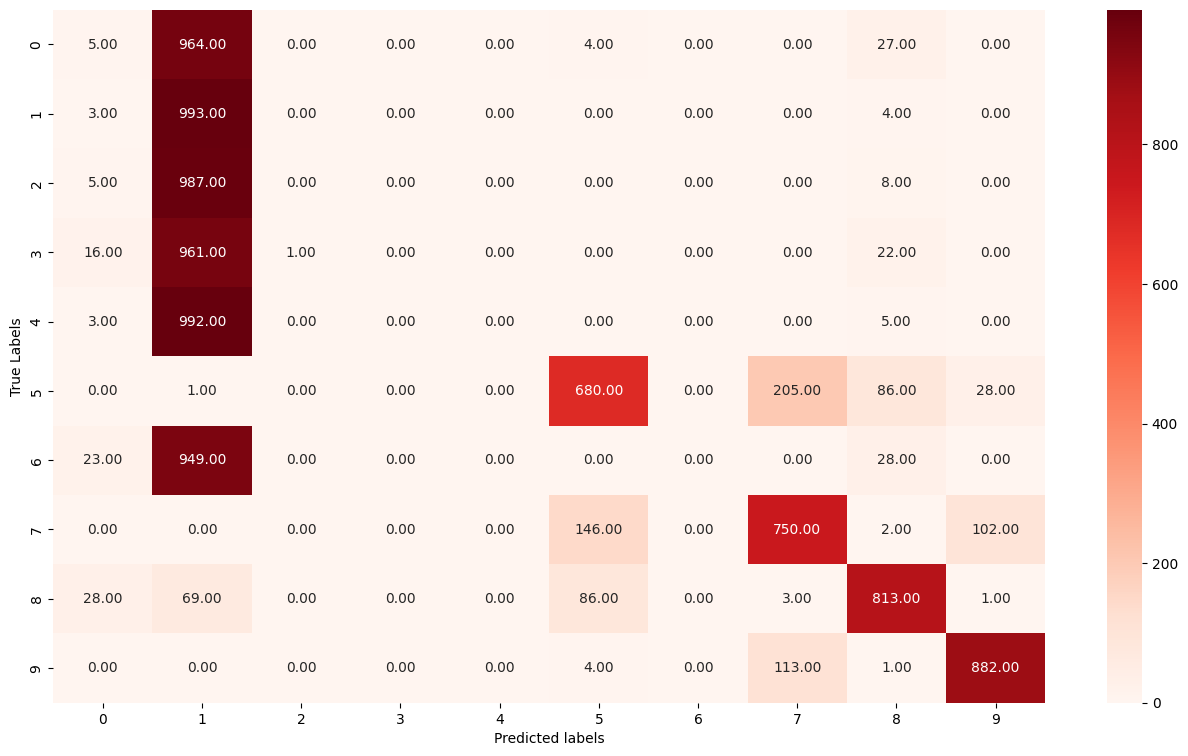

In [39]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, y_preds)

plt.figure(figsize=(16,9))
sns.heatmap(cm, annot = True, fmt='.2f', cmap = 'Reds')
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
plt.show()

1/1 [==============================] - 0s 18ms/step


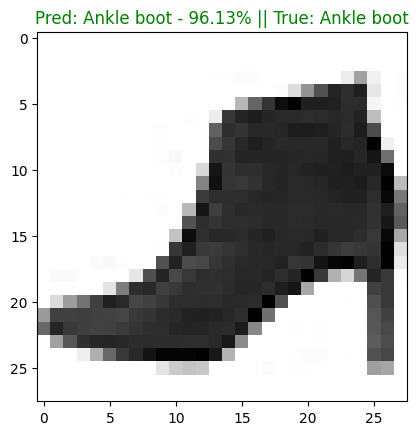

In [50]:
def random_image_prediction(model, image_data, label_data, class_names):
  """
  This Function helps us to predict the accuracy of the predicted image.
  - Get a random number.
  - With the help of random number get the image.
  - Predict the label for that image.
  - Set the predicted label.
  - Know the True label.
  - Give a color to the prediction
  """

  rand = random.randint(0, len(image_data))

  target_image = image_data[rand]
  pred_proba = model.predict(target_image.reshape(1, 28, 28))
  pred_label = class_names[pred_proba.argmax()]
  true_label = class_names[label_data[rand]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  color = "green" if pred_label == true_label else 'red'

  plt.title("Pred: {} - {:.2f}% || True: {}".format(pred_label,
                                                100*tf.reduce_max(pred_proba),
                                                true_label), color = color)

  plt.show()


random_image_prediction(model_5, test_data_norm, test_labels, class_names)

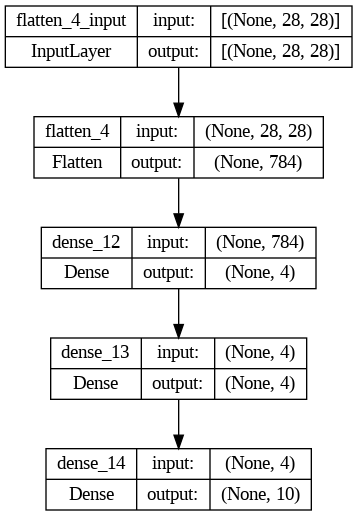

In [46]:
plot_model(model_5, show_shapes=True)

In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
